<a href="https://colab.research.google.com/github/kirubanath/ML-DS_learnings/blob/main/Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Extract live weather data in Mohali for the next 15 days:

[https://weather.com/en-IN/weather/tenday/l/d253814420804f28d49f7a75130e71b797c3c93f9ded842eaf6769e3784da352](https://weather.com/en-IN/weather/tenday/l/d253814420804f28d49f7a75130e71b797c3c93f9ded842eaf6769e3784da352)

* Task scrape
    * day | period (as Wed 11 | Day, Wed 11 | Night etc.)
    * the temperature for the period
    * the short description (e.g. Mostly Clear, Sunny etc.)
    * the long weather description (e.g. Showers late at night. Low 12ºC. Winds SE at 10 to 15 km/h. Chance of rain 40%.)
    
Store the scraped data strings in a Pandas DataFrame



**Hint:** The weather information is found in a div tag with `class_='DailyForecast--DisclosureList--nosQS'`

Your DataFrame should be similar to the below screenshot (with the same columns):

![](attachment:Screenshot%202023-01-11%20145146-2.png)

__Importing necessary libraries__

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

__Getting the content from the website__

In [ ]:
source = requests.get('https://weather.com/en-IN/weather/tenday/l/d253814420804f28d49f7a75130e71b797c3c93f9ded842eaf6769e3784da352')

__creating the beautiful soup object__

In [ ]:
soup   = BeautifulSoup(source.content , features='html.parser')

<!DOCTYPE html>
<html dir="ltr" lang="en-IN">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Be prepared with the most accurate 10-day forecast for Mohali, Punjab with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="app-id=295646461" data-react-helmet="true" name
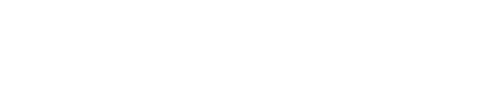
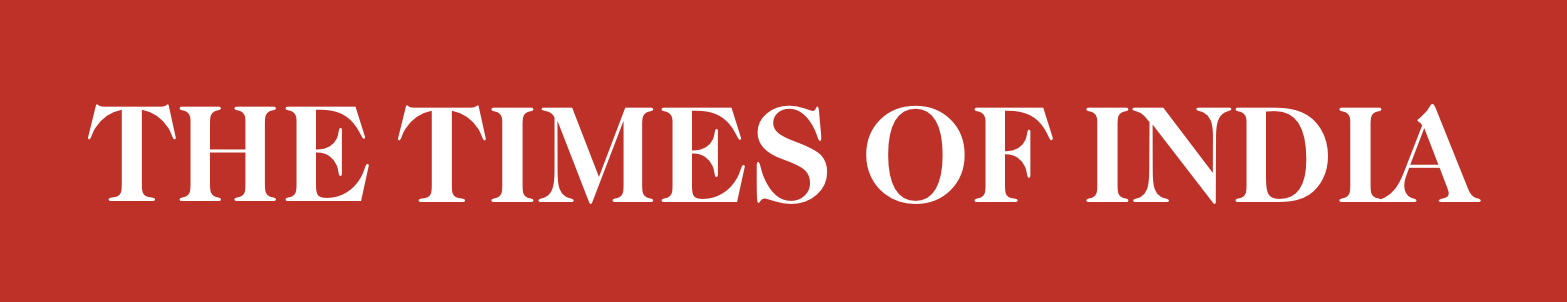
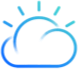

In [ ]:
print(soup.prettify())

__Getting the class with the required information__

In [ ]:
div = soup.find(class_='DailyForecast--DisclosureList--nosQS')

**Extracting the required information**

In [ ]:
day = div.find_all(class_= 'DailyContent--daypartName--3emSU')
day = [d.text for d in day]

In [ ]:
temp = div.find_all(class_='DailyContent--temp--1s3a7')
temp = [t.text for t in temp]

In [ ]:
short_desc = div.find_all(class_="DailyContent--Condition--1zRBJ")
short_desc = [s.text for s in short_desc]
short_desc = [s.replace(' Night','') for s in short_desc]

In [ ]:
desc = div.find_all(class_='DailyContent--narrative--3Ti6_')
desc = [n.text for n in desc]

**Create the Dataframe**

In [ ]:
weather = pd.DataFrame({
    'day'        : day,
    'temp'       : temp,
    'short_desc' : short_desc,
    'desc'       : desc
})

In [ ]:
pd.set_option('display.max_colwidth', 10000)
weather

,day,temp,short_desc,desc
0,Fri 20 | Night,8°,Partly Cloudy,Partly cloudy. Low 8ºC. Winds N and variable.
1,Sat 21 | Day,19°,Sunny,Generally clear. High 19ºC. Winds NW and variable.
2,Sat 21 | Night,8°,Clear,Generally clear. Low 8ºC. Winds N and variable.
3,Sun 22 | Day,20°,Sunny,Generally clear. High 20ºC. Winds NNW and variable.
4,Sun 22 | Night,9°,Mostly Clear,Generally clear. Low 9ºC. Winds NNE and variable.
5,Mon 23 | Day,20°,Mostly Sunny,Generally clear. High 20ºC. Winds NW and variable.
6,Mon 23 | Night,11°,Scattered Showers,Showers late at night. Low 11ºC. Winds NNE and variable. Chance of rain 30%.
7,Tue 24 | Day,19°,Scattered Showers,Showers. High 19ºC. Winds SE at 10 to 15 km/h. Chance of rain 50%.
8,Tue 24 | Night,12°,Rain,Rain and thunder. Low 12ºC. Winds SE and variable. Chance of rain 60%.
9,Wed 25 | Day,18°,Scattered Thunderstorms,Scattered thunderstorms. High 18ºC. Winds SE at 10 to 15 km/h. Chance of rain 80%.


Here I have missed out on the morning data of today since I am doing this project at night.